# Read and visualise Files

## Import all the necessary libraries

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import math

def get_file_name(var:str):
    return var[7:-4]

## Show datasets in folders

In [68]:
# Specify the directory path
directory_path = 'G:\\My Drive\\Master Thesis\\Simulation\\Dataset'

# Get a list of all items (files and directories) in the specified path
all_items = os.listdir(directory_path)

# Iterate over each item and check if it's a directory
for item in all_items:
    folder_path = os.path.join(directory_path, item)
    if os.path.isdir(folder_path):
        print(f"\nFolder: {item}")

        folder_contents = os.listdir(folder_path)
        for file in folder_contents:
            file_path = os.path.join(folder_path, file)
            print(f"    -> {file}")


Folder: Dataset_2024-06-20_12-40-28
    -> data_1_normal.csv
    -> data_2_gripper_1.csv
    -> data_3_gripper_2.csv
    -> true_no_lagged_graph_extendend.csv

Folder: Dataset_2024-06-20_16-26-23
    -> data_1_normal.csv
    -> data_2_gripper_1.csv
    -> data_3_gripper_2.csv
    -> true_no_lagged_graph_extendend.csv
    -> data_4_camera_1.csv
    -> Results

Folder: Dataset_2024-06-21_02-01-04
    -> data_1_normal.csv
    -> data_2_gripper_1.csv
    -> data_3_gripper_2.csv
    -> data_4_camera_1.csv
    -> data_5_camera_2.csv
    -> data_6_conveyor_1.csv
    -> data_7_conveyor_2.csv

Folder: Dataset_2024-06-21_18-27-11
    -> data_1_normal.csv

Folder: Dataset_2024-06-21_20-29-50
    -> data_1_normal.csv
    -> data_2_gripper_1.csv
    -> data_3_camera_1.csv
    -> Results

Folder: Dataset_2024-06-21_23-44-10
    -> data_1_normal.csv

Folder: Dataset_2024-06-24_11-49-00
    -> data_1_normal.csv
    -> data_2_gripper_1.csv
    -> data_3_gripper_2.csv
    -> data_4_camera_2.csv
    -> 

## Select folder to read

In [69]:
folder_input = input("Please select folder.")

In [70]:
# Specify the directory path
directory_path = 'G:\\My Drive\\Master Thesis\\Simulation\\Dataset'
files = {}
folder = folder_input

folder_path = os.path.join(directory_path, folder)
if os.path.isdir(folder_path):
    print(f"Chosen folder: {item}")
    folder_contents = os.listdir(folder_path)
    for file in folder_contents:
        file_path = os.path.join(folder_path, file)
        print(f"-> {file}")
        if file[0:4] == 'data':
             files[f"{get_file_name(file)}"] = file_path

Chosen folder: Dataset_2024-06-25_22-47-46
-> data_1_normal.csv


In [71]:
file_input = input("Please select file.")

In [72]:
file_selected = files[file_input]
file_selected

'G:\\My Drive\\Master Thesis\\Simulation\\Dataset\\Dataset_2024-06-25_22-47-46\\data_1_normal.csv'

### Nodes

In [73]:
EoL_nodes = ['EoL_1_X', 'EoL_1_Y',
             'EoL_2_X', 'EoL_2_Y',
             'EoL_3_X', 'EoL_3_Y',
             'EoL_4_X', 'EoL_4_Y',
             'EoL_5_X','EoL_5_Y',
             'EoL_6_X', 'EoL_6_Y']

con_nodes = ['con_1','con_2','con_3']

rob_nodes = ['rob_1_1', 'rob_1_2','rob_1_3', 'rob_1_4',
             'rob_2_1', 'rob_2_2','rob_2_3', 'rob_2_4',
             'rob_1_maxVel', 'rob_1_gripper','rob_2_maxVel', 'rob_2_gripper']

cam_nodes = ['cam_1_X', 'cam_2_X', 'cam_3_X',
             'cam_1_Y', 'cam_2_Y', 'cam_3_Y']

## Normal Dataset

### End of line

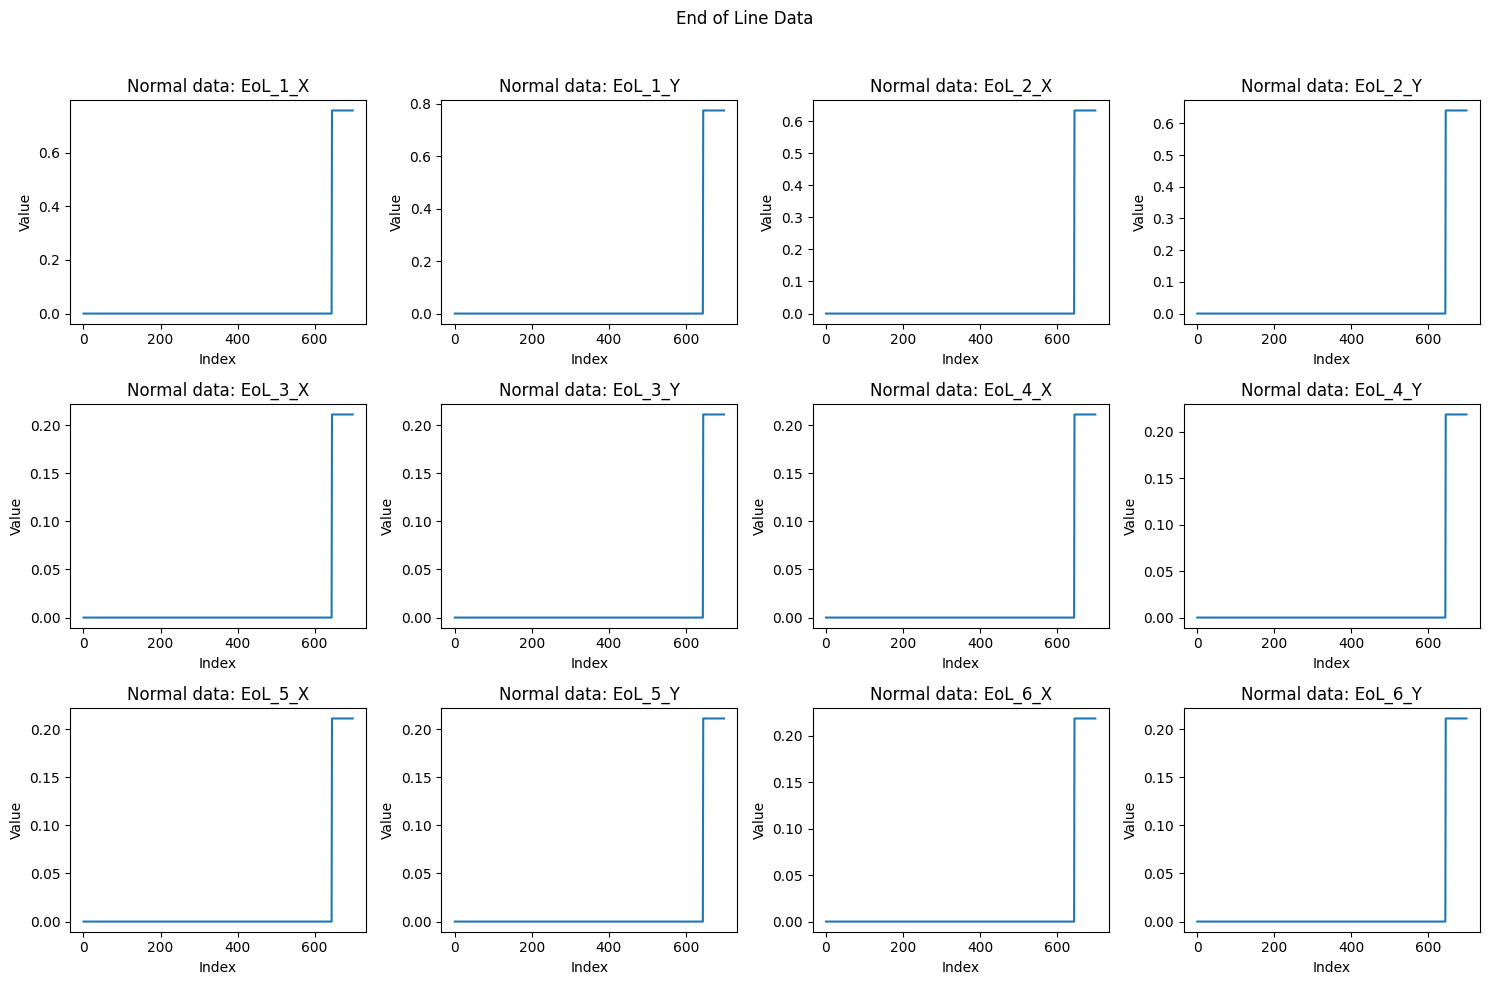

In [74]:
normal_data_df = pd.read_csv(file_selected)

normal_data_df.head()

EoL_data_df = normal_data_df[EoL_nodes]

fig, axes = plt.subplots(3,4, figsize=(15, 10))
fig.suptitle('End of Line Data')

for i, ax in enumerate(axes.flatten()):
    column =  EoL_data_df.columns[i]
    ax.plot(EoL_data_df[column])
    ax.set_title(f'Normal data: {column}')
    ax.set_xlabel('Index')
    ax.set_ylabel('Value')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


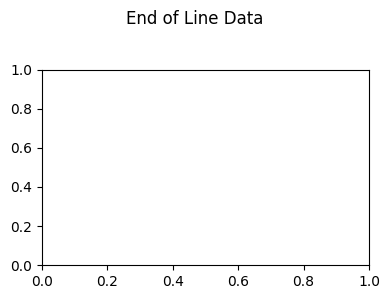

In [75]:
normal_data_df = pd.read_csv(file_selected)

normal_data_df.head()

score_data_df = normal_data_df['score']

fig, axes = plt.subplots(1,1, figsize=(4, 3))
fig.suptitle('End of Line Data')
ax.plot(score_data_df[700:])
ax.set_title(f'Normal data: score')
ax.set_xlabel('Index')
ax.set_ylabel('Value')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Conveyor

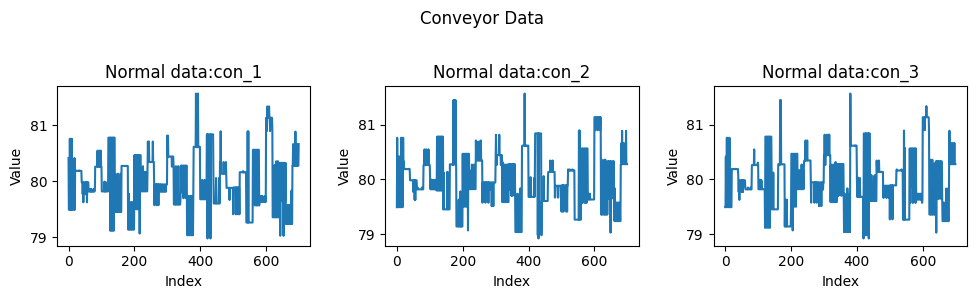

In [76]:
con_data_df = pd.read_csv(file_selected)

con_data_df.head()

con_data_df = con_data_df[con_nodes]

fig, axes = plt.subplots(1,3, figsize=(10, 3))
fig.suptitle('Conveyor Data')

for i, ax in enumerate(axes.flatten()):
    column =  con_data_df.columns[i]
    ax.plot(con_data_df[column])
    ax.set_title(f'Normal data:{column}')
    ax.set_xlabel('Index')
    ax.set_ylabel('Value')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Robots

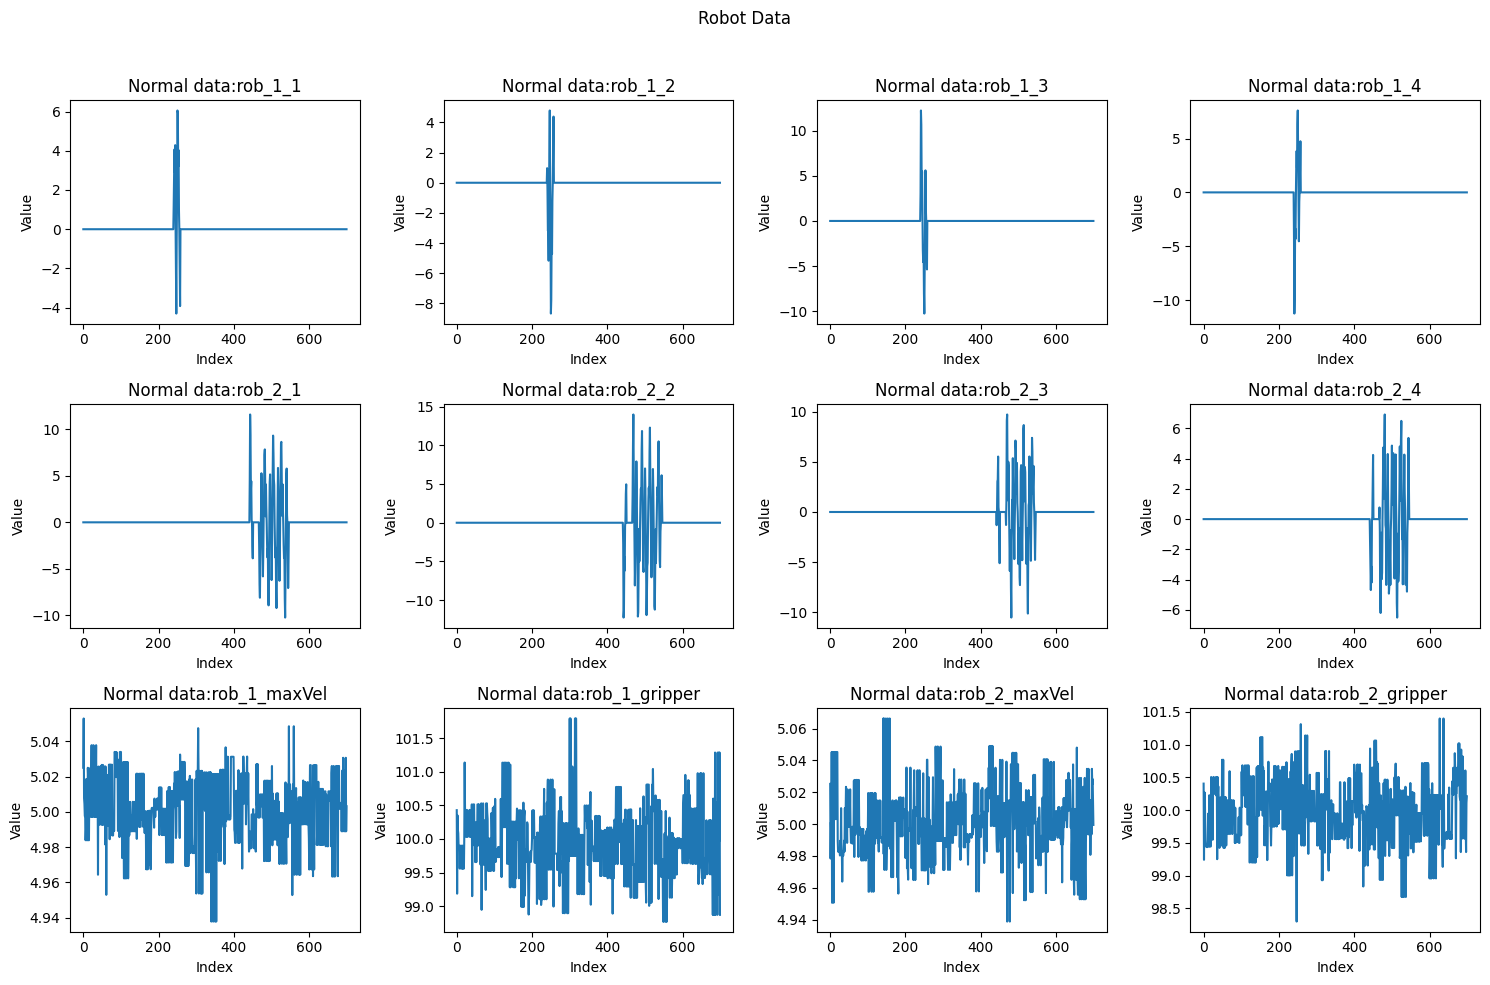

In [77]:
rob_data_df = pd.read_csv(file_selected)

rob_data_df.head()

rob_data_df = rob_data_df[rob_nodes]

fig, axes = plt.subplots(3,4, figsize=(15, 10))
fig.suptitle('Robot Data')

for i, ax in enumerate(axes.flatten()):
    column =  rob_data_df.columns[i]
    ax.plot(rob_data_df[column])
    ax.set_title(f'Normal data:{column}')
    ax.set_xlabel('Index')
    ax.set_ylabel('Value')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Cameras

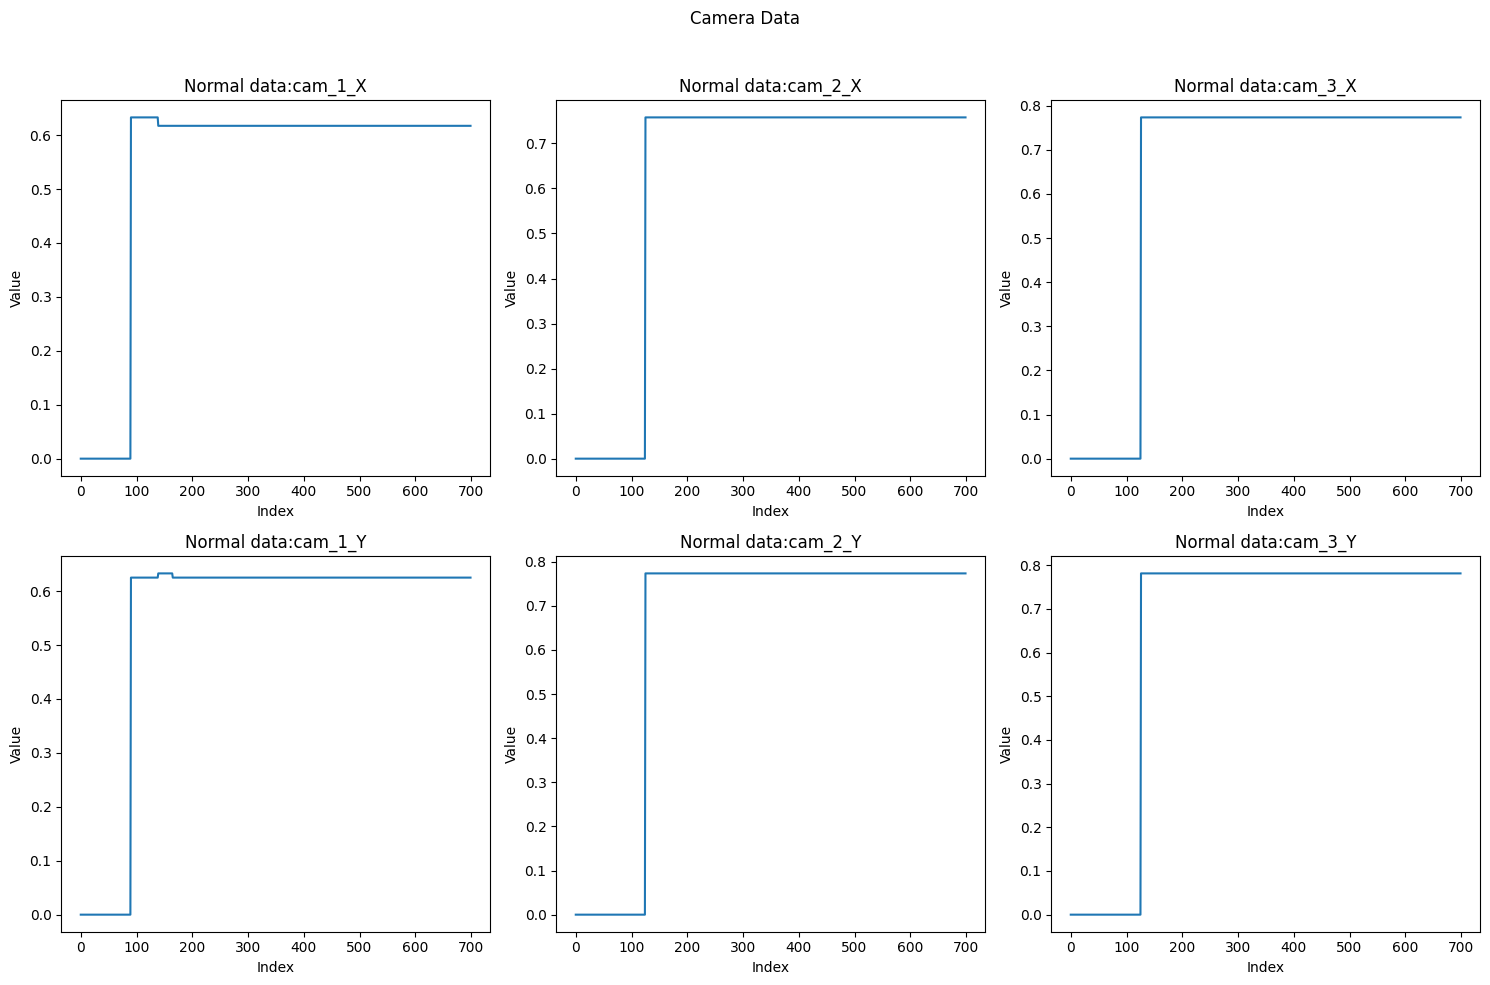

In [78]:
cam_data_df = pd.read_csv(file_selected)

cam_data_df.head()

cam_data_df = cam_data_df[cam_nodes]

fig, axes = plt.subplots(2,3, figsize=(15, 10))
fig.suptitle('Camera Data')

for i, ax in enumerate(axes.flatten()):
    column =  cam_data_df.columns[i]
    ax.plot(cam_data_df[column])
    ax.set_title(f'Normal data:{column}')
    ax.set_xlabel('Index')
    ax.set_ylabel('Value')

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

In [ ]:
# Timestamps when only one complete assembly is produced

# Camera 1: 4.45
# Camera 1: 5.7
# Camera 1: 6.9
# Camera 1: 8.2

# pick - 11.95
# place - 12.35

# pick - 22.05
# place - 23.3

# pick - 23.9
# place - 24.45

# pick - 25.05
# place - 25.5

# pick - 26.1
# place - 26.65

# Camera EoL: 32.2

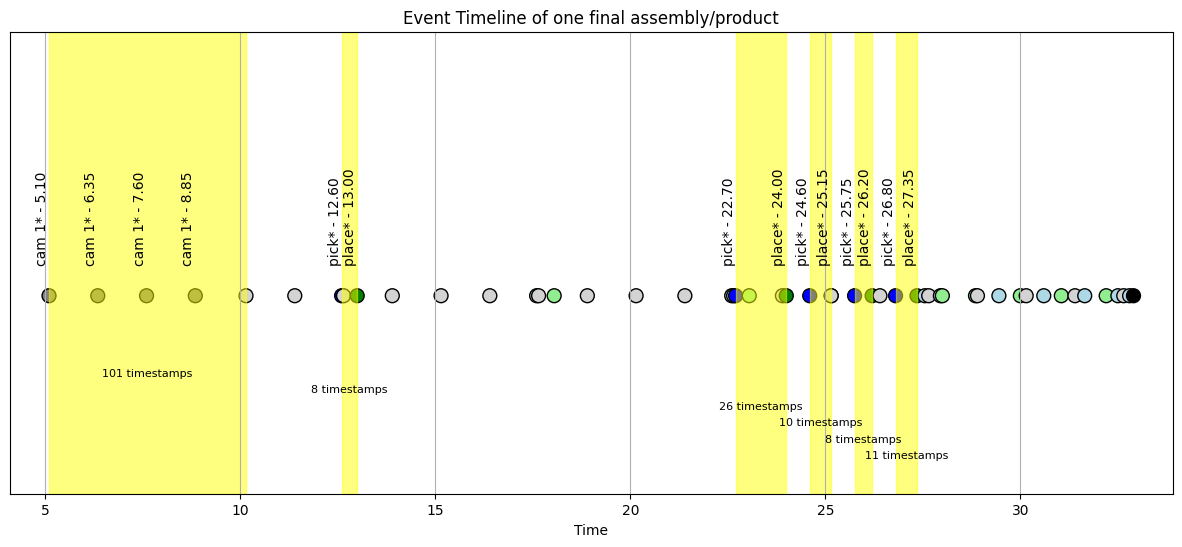

In [126]:
# List of events
events = [
    {"action": "cam 1*", "time": 5.1},
    {"action": "cam 1*", "time": 6.35},
    {"action": "cam 1*", "time": 7.6},
    {"action": "cam 1*", "time": 8.85},
    {"action": "cam 1", "time": 10.15},
    {"action": "cam 1", "time": 11.4},
    {"action": "pick*", "time": 12.6},
    {"action": "cam 1", "time": 12.65},
    {"action": "place*", "time": 13.0},
    {"action": "cam 1", "time": 13.9},
    {"action": "cam 1", "time": 15.15},
    {"action": "cam 1", "time": 16.4},
    {"action": "pick", "time": 17.6},
    {"action": "cam 1", "time": 17.65},
    {"action": "place", "time": 18.05},
    {"action": "cam 1", "time": 18.9},
    {"action": "cam 1", "time": 20.15},
    {"action": "cam 1", "time": 21.4},
    {"action": "pick", "time": 22.6},
    {"action": "cam 1", "time": 22.65},
    {"action": "pick*", "time": 22.7},
    {"action": "place", "time": 23.05},
    {"action": "cam 1", "time": 23.9},
    {"action": "place*", "time": 24.0},
    {"action": "pick*", "time": 24.6},
    {"action": "place*", "time": 25.15},
    {"action": "cam 1", "time": 25.15},
    {"action": "pick*", "time": 25.75},
    {"action": "place*", "time": 26.2},
    {"action": "cam 1", "time": 26.4},
    {"action": "pick*", "time": 26.8},
    {"action": "place*", "time": 27.35},
    {"action": "pick", "time": 27.55},
    {"action": "cam 1", "time": 27.65},
    {"action": "pick", "time": 27.95},
    {"action": "place", "time": 28.0},
    {"action": "place", "time": 28.85},
    {"action": "cam 1", "time": 28.9},
    {"action": "pick", "time": 29.45},
    {"action": "place", "time": 30.0},
    {"action": "cam 1", "time": 30.15},
    {"action": "pick", "time": 30.6},
    {"action": "place", "time": 31.05},
    {"action": "cam 1", "time": 31.4},
    {"action": "pick", "time": 31.65},
    {"action": "place", "time": 32.2},
    {"action": "pick", "time": 32.5},
    {"action": "cam 1", "time": 32.65},
    {"action": "pick", "time": 32.8},
    {"action": "cam 4", "time": 32.9},
]

fig, ax = plt.subplots(figsize=(15, 6))

times = [event["time"] for event in events]
actions = [event["action"] for event in events]

action_colors = {
    "cam 1*": "grey",
    "cam 1": "lightgrey",
    "pick*": "blue",
    "pick": "lightblue",
    "place*": "green",
    "place": "lightgreen",
    "cam 4": "black"
}

colors = [action_colors[action] for action in actions]

ax.scatter(times, [1] * len(times), c=colors, s=100, edgecolor='black')

for i, event in enumerate(events):
    if '*' in event["action"]:
        ax.text(times[i], 1.05, f"{event['action']} - {event['time']:.2f}", rotation=90, ha='right')

# Vertical bars indicate regions, where the various datapoints relate to the row at the end of line
regions = []
current_region_start = None

for event in events:
    if 'cam 1*' in event["action"]:
        if current_region_start is None:
            current_region_start = event["time"]
    else:
        if current_region_start is not None:
            regions.append((current_region_start, event["time"]))
            current_region_start = None

for event in events:
    if 'pick*' in event["action"]:
        if current_region_start is None:
            current_region_start = event["time"]
    elif 'place*' in event["action"]:
        if current_region_start is not None:
            regions.append((current_region_start, event["time"]))
            current_region_start = None

counter = 0

for start, end in regions:
    ax.axvspan(start, end, color='yellow', alpha=0.5)
    counter +=1
    ax.text((start + end) / 2.0,0.9-counter*0.025,f'{math.floor((end-start)/0.05)} timestamps', ha='center', va='bottom', fontsize=8, color='black')

# Customize the plot
ax.set_yticks([])
ax.set_ylim(0.7, 1.4)
ax.set_xlim(min(times) - 1, max(times) + 1)
ax.set_xlabel('Time')
ax.set_title('Event Timeline of one final assembly/product')

# Show the plot
plt.grid(True)
plt.show()
